# HW2: Logistic regression - titanic or others (kaggle 練習 and confusion matrix)

- The code in this notebook was generated using [GitHub Copilot](https://github.com/features/copilot).
- Dataset: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview).

## Prompt
Generate a Python script using the CRISP-DM process to predict survival on the Titanic dataset. Follow these steps:

1. Business Understanding: 
    - The goal is to predict whether a passenger survived based on their demographic and ticket data.
2. Data Understanding: 
    - Load the Titanic training dataset and examine its structure using info() and describe(). Show the first few rows.
3. Data Preparation: 
  Process the data by:
    - Creating a Fsize feature as the family size by combining SibSp and Parch.
    - Extracting the first letter of Cabin to capture cabin category information.
    - Dropping columns not needed in the model, including PassengerId, Name, and Ticket.
    - Handling missing values by filling Age and Fare with median values and Embarked with the mode.
    - Encoding categorical columns (Sex and Embarked) using label encoding.
4. Modeling:
    - Split the data into training and test sets.
    - Standardize the features.
    - Train a logistic regression model to predict the target variable Survived.
5. Evaluation:
    - Use accuracy, confusion matrix, and classification report to evaluate the model on the test set.
6. Deployment:
    - Load the test dataset, apply the same preprocessing steps, and make predictions on the test data.
    - Export the predictions with PassengerId and Survived columns to a CSV file.

## Modify
1. Visualize relationships between features and survival.
2. Train the model on the full training dataset before making predictions on the test dataset.

## Result

### Step 1: Business Understanding
- Predict the survival of passengers on the Titanic.

### Step 2: Data Understanding
- Load and explore the data to identify key patterns and issues, using summary statistics and visualizations.

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and examine the dataset structure
train_data = pd.read_csv('dataset/titanic/train.csv')
display(train_data.info())
display(train_data.describe())
display(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


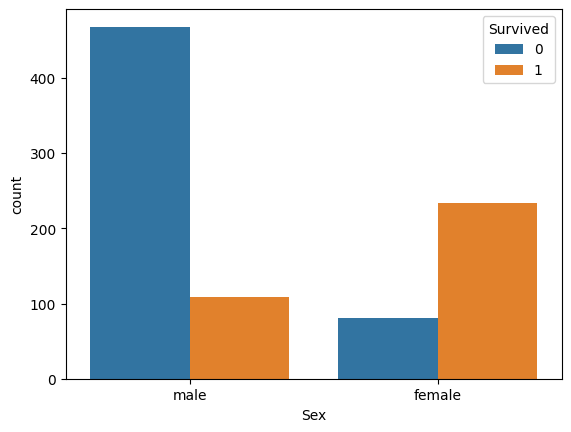

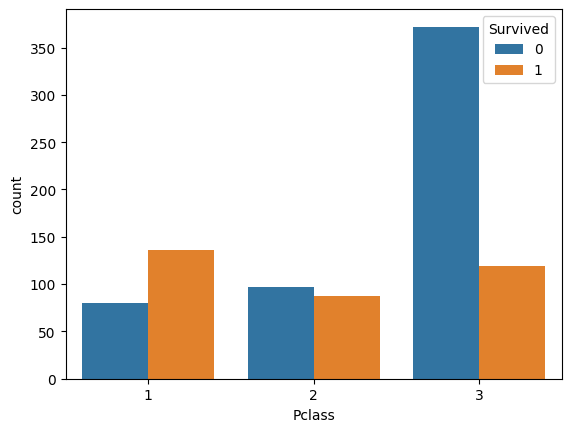

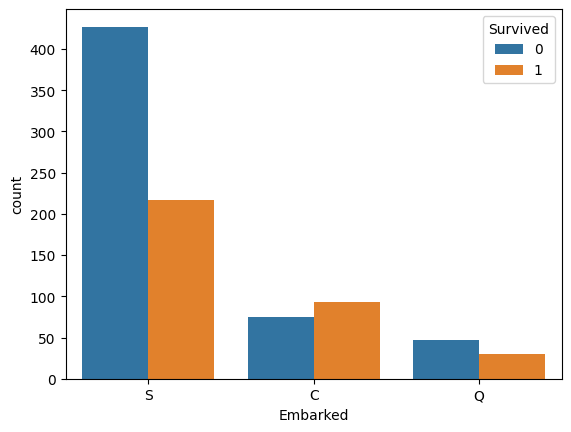

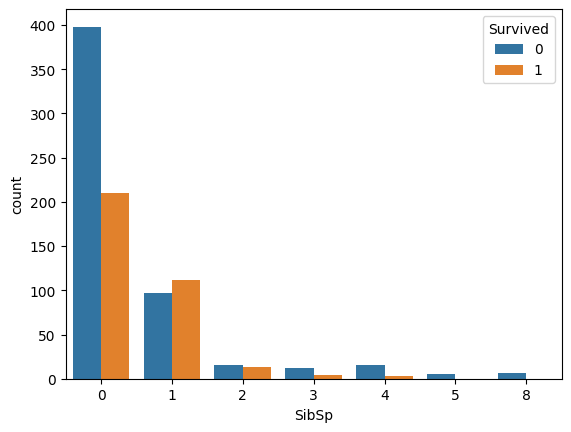

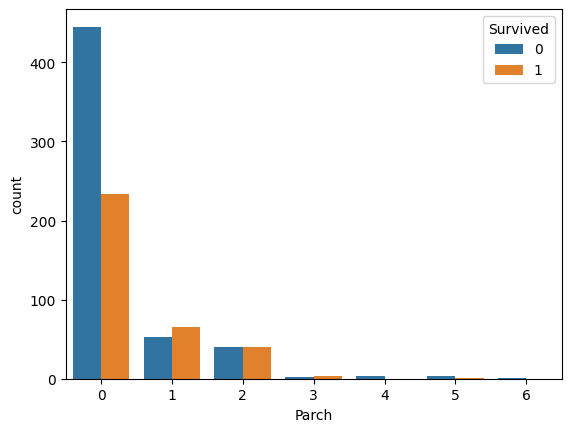

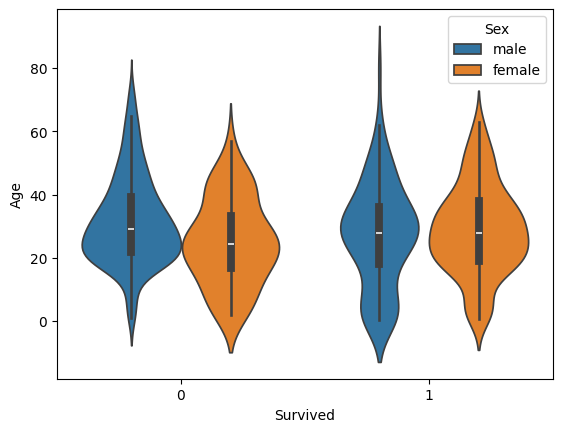

In [160]:
# Exploratory Data Analysis: Visualize relationships between features and survival

# sex vs survival
sns.countplot(train_data, x="Sex", hue="Survived")
plt.show()

# Pclass vs survival
sns.countplot(train_data, x="Pclass", hue="Survived")
plt.show()

# Embarked vs survival
sns.countplot(train_data, x="Embarked", hue="Survived")
plt.show()

# SibSp vs survival
sns.countplot(train_data, x="SibSp", hue="Survived")
plt.show()

# Parch vs survival
sns.countplot(train_data, x="Parch", hue="Survived")
plt.show()

# Age vs sex vs survival
sns.violinplot(x="Survived", y="Age", hue='Sex', data=train_data)
plt.show()

### Step3: Data Preparation
- Clean and transform data—engineer features, handle missing values, encode categorical variables, and split/scale data for modeling.

In [161]:
print(train_data[train_data['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


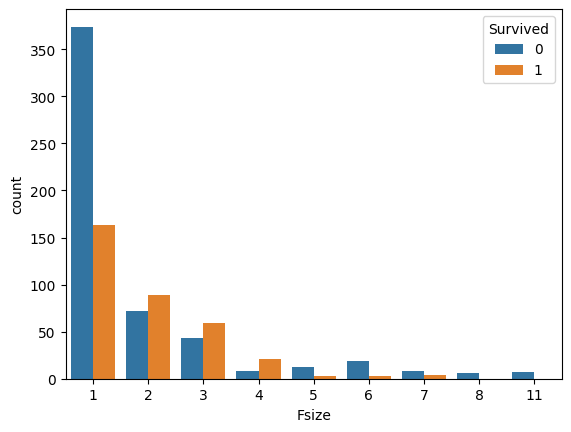

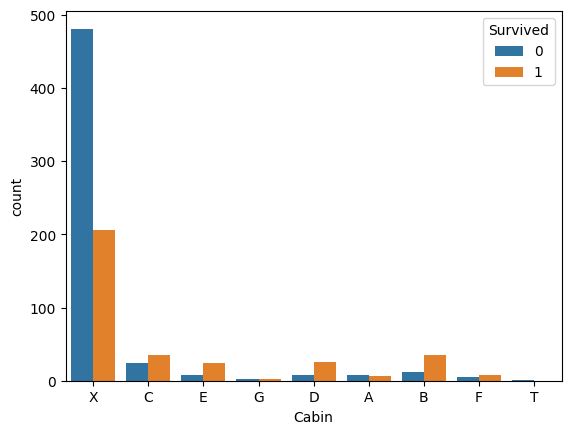

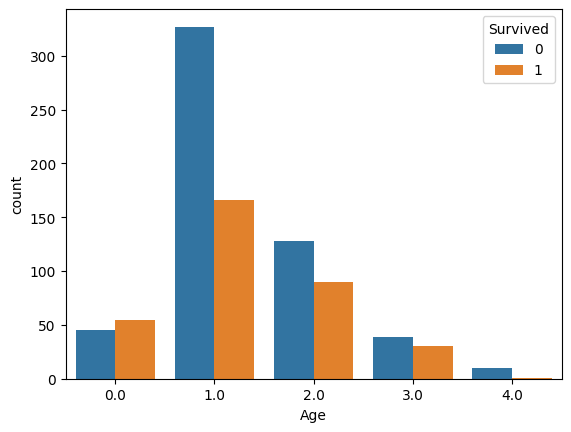

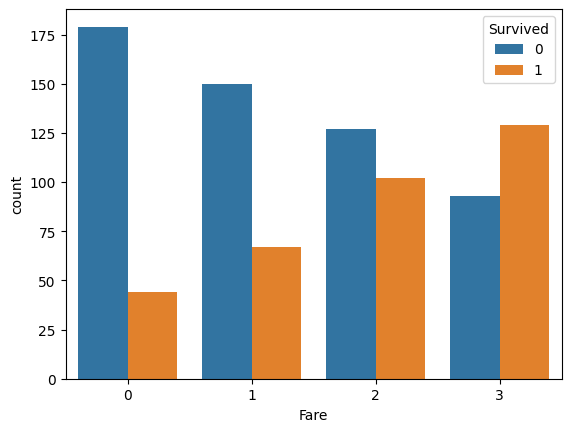

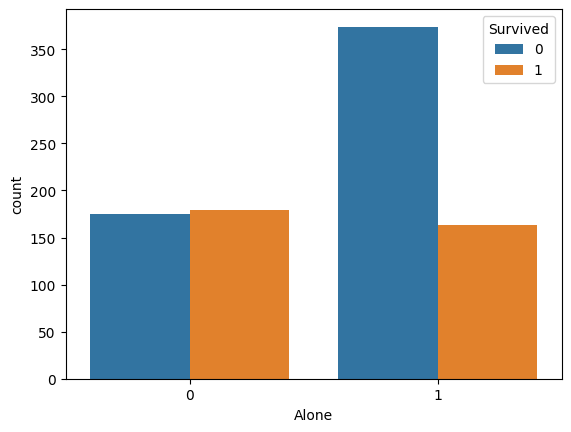

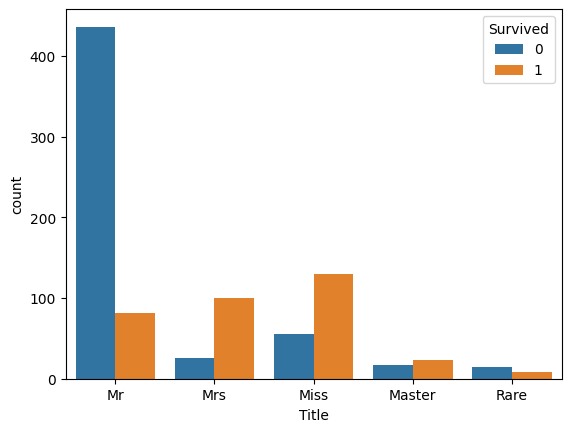

In [162]:
# Define feature engineering function for family size
def processing_family_size(dataset):
  dataset['Fsize'] = dataset['SibSp'] + dataset['Parch'] + 1
  return dataset

# Define feature engineering function for cabin
def processing_cabin(dataset):
  dataset['Cabin'] = dataset['Cabin'].fillna('X').map(lambda x: x[0])
  return dataset

# Define feature engineering function for age
def processing_age(dataset):
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[dataset['Age'] > 64, 'Age'] = 4
  return dataset

# Define feature engineering function for fare
def processing_fare(dataset):
  dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)
  return dataset

# Define feature engineering function for alone
def processing_alone(dataset):
  dataset['Alone'] = 0
  dataset.loc[dataset['Fsize'] == 1, 'Alone'] = 1
  return dataset

# Define feature engineering function for title
def processing_title(dataset):
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  return dataset


# Drop columns that won't be used in the model
train_data.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

# Handle missing values
train_data['Age'] = train_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
train_data['Embarked'] = train_data['Embarked'].fillna(
    train_data['Embarked'].mode()[0])
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())

# Apply feature engineering
train_data = processing_family_size(train_data)
sns.countplot(train_data, x="Fsize", hue="Survived")
plt.show()

train_data = processing_cabin(train_data)
sns.countplot(train_data, x="Cabin", hue="Survived")
plt.show()

train_data = processing_age(train_data)
sns.countplot(train_data, x="Age", hue="Survived")
plt.show()

train_data = processing_fare(train_data)
sns.countplot(train_data, x="Fare", hue="Survived")
plt.show()

train_data = processing_alone(train_data)
sns.countplot(train_data, x="Alone", hue="Survived")
plt.show()

train_data = processing_title(train_data)
train_data.drop(['Name'], axis=1, inplace=True)
sns.countplot(train_data, x="Title", hue="Survived")
plt.show()

# Encode categorical variables
sex_label_encoder = LabelEncoder()
embarked_label_encoder = LabelEncoder()
cabin_label_encoder = LabelEncoder()
title_label_encoder = LabelEncoder()
train_data['Sex'] = sex_label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = embarked_label_encoder.fit_transform(
    train_data['Embarked'])
train_data['Cabin'] = cabin_label_encoder.fit_transform(train_data['Cabin'])
train_data['Title'] = title_label_encoder.fit_transform(train_data['Title'])

# Split the data into features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 4: Modeling
- Train a logistic regression model to predict survival.

In [163]:
# Train a logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Step 5: Evaluation
- Assess model accuracy and visualize the confusion matrix for performance insights.

Accuracy: 0.8555555555555555


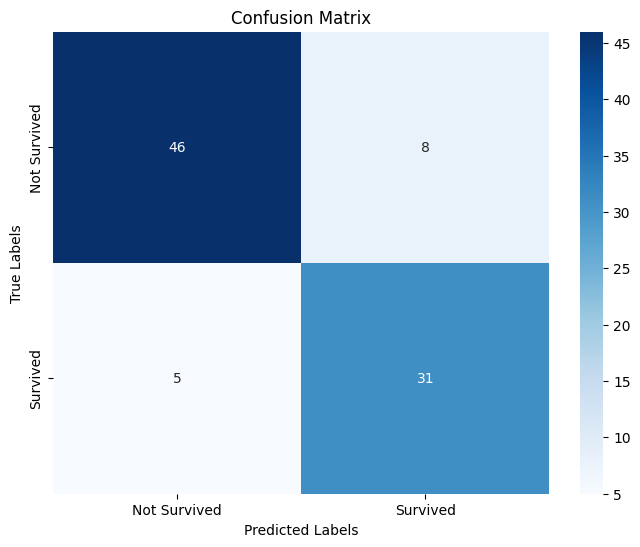

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        54
           1       0.79      0.86      0.83        36

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90



In [164]:
# Evaluate the model using accuracy, confusion matrix, and classification report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

### Step 6: Deployment
- Prepare test data, predict survival, and save results to a CSV for submission.

In [165]:
# Fit the model on the full training data for deployment
X_train_full = scaler.fit_transform(X)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_full, y)

# Load the test dataset
test_data = pd.read_csv('dataset/titanic/test.csv')

# Data Preparation for test data
# Drop columns not used in the model
test_data.drop(['Ticket'], axis=1, inplace=True)

# Handle missing values
test_data['Age'] = test_data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# Apply feature engineering
test_data = processing_family_size(test_data)
test_data = processing_cabin(test_data)
test_data = processing_age(test_data)
test_data = processing_fare(test_data)
test_data = processing_alone(test_data)
test_data = processing_title(test_data)
test_data.drop(['Name'], axis=1, inplace=True)

# Encode categorical variables
test_data['Sex'] = sex_label_encoder.transform(test_data['Sex'])
test_data['Embarked'] = embarked_label_encoder.transform(test_data['Embarked'])
test_data['Cabin'] = cabin_label_encoder.transform(test_data['Cabin'])
test_data['Title'] = title_label_encoder.transform(test_data['Title'])

# Standardize the features
X_test_data = scaler.transform(test_data.drop('PassengerId', axis=1))

# Predict on the test data
test_predictions = model.predict(X_test_data)

# Create a DataFrame with the results
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Export the results to a CSV file
submission.to_csv('submission.csv', index=False)
